### loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### loading data

In [2]:
from google.colab import files
files.upload()

Saving Index2018.csv to Index2018.csv


{'Index2018.csv': b'\xef\xbb\xbfdate,spx,dax,ftse,nikkei\r\n07/01/1994,469.9,2224.95,3445.98,18124.01\r\n10/01/1994,475.27,2225,3440.58,18443.44\r\n11/01/1994,474.13,2228.1,3413.77,18485.25\r\n12/01/1994,474.17,2182.06,3372.02,18793.88\r\n13/01/1994,472.47,2142.37,3360.01,18577.26\r\n14/01/1994,474.91,2151.05,3400.56,18973.7\r\n17/01/1994,473.3,2115.56,3407.83,18725.37\r\n18/01/1994,474.25,2130.35,3437.01,18514.55\r\n19/01/1994,474.3,2132.52,3475.15,19039.4\r\n20/01/1994,474.98,2098.36,3469.99,19183.92\r\n21/01/1994,474.72,2073.94,3484.21,19307.43\r\n24/01/1994,471.97,2107.29,3481.42,18353.24\r\n25/01/1994,470.92,2090.78,3443.97,18648.36\r\n26/01/1994,473.2,2128.66,3436.08,19138.21\r\n27/01/1994,477.05,2123.31,3427.25,18891.79\r\n28/01/1994,478.7,2156.61,3447.45,18757.88\r\n31/01/1994,481.61,2192.6,3491.83,20229.12\r\n01/02/1994,479.62,2181.88,3481.47,20416.34\r\n02/02/1994,482,2184.05,3520.27,20250.03\r\n03/02/1994,480.71,2137.08,3491.48,20174.82\r\n04/02/1994,469.81,2143.9,3475.44,20

In [3]:
df = pd.read_csv("/content/Index2018.csv")
df_copy = df

In [4]:
df_copy.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


### preprocessing

In [5]:
df.columns

Index(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

In [6]:
df_copy["date"] = pd.to_datetime(df_copy["date"])

In [7]:
df_copy.set_index("date", inplace=True)

In [8]:

df_copy = df_copy.asfreq("b")

In [9]:
(df_copy.isna()).sum()

spx       920
dax       920
ftse      920
nikkei    920
dtype: int64

In [10]:
del df_copy["dax"], df_copy["ftse"], df_copy["nikkei"],

In [11]:
df_copy_final = df_copy.fillna(method="ffill")

### create white noise to see the deffernt

In [12]:
wn = np.random.normal(loc = df_copy["spx"].mean(), scale = df_copy["spx"].std(), size = len(df_copy)  )

In [13]:
df_copy["wn"] = wn

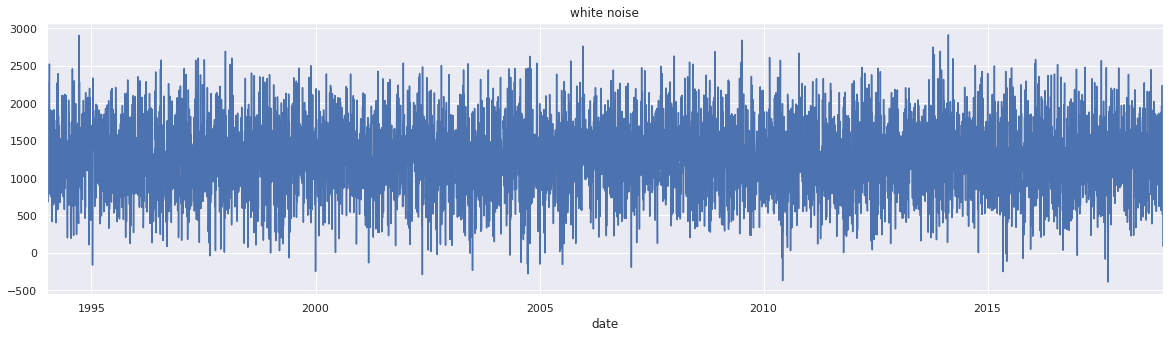

In [14]:
df_copy["wn"].plot(title = "white noise", figsize=(20,5))

(-500.0, 3000.0)

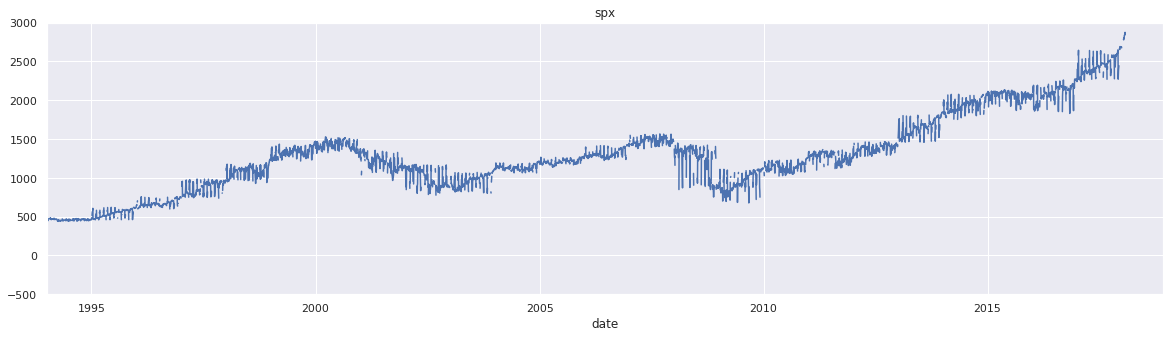

In [15]:
df_copy["spx"].plot(title = "spx", figsize=(20,5))
plt.ylim(-500, 3000)

### compare with random walk

In [16]:
files.upload()

Saving RandWalk.csv to RandWalk.csv


{'RandWalk.csv': b'date,price\r\n07/01/1994,1122.139662\r\n08/01/1994,1135.238562\r\n09/01/1994,1109.897831\r\n10/01/1994,1080.34786\r\n11/01/1994,1082.095245\r\n12/01/1994,1083.639265\r\n13/01/1994,1067.146255\r\n14/01/1994,1080.12972\r\n15/01/1994,1110.697678\r\n16/01/1994,1100.424288\r\n17/01/1994,1071.036309\r\n18/01/1994,1084.471693\r\n19/01/1994,1026.649039\r\n20/01/1994,1061.19424\r\n21/01/1994,1054.308122\r\n22/01/1994,1040.633157\r\n23/01/1994,1056.794183\r\n24/01/1994,1040.535104\r\n25/01/1994,1057.83579\r\n26/01/1994,1041.120905\r\n27/01/1994,1044.791756\r\n28/01/1994,1046.486394\r\n29/01/1994,1047.815364\r\n30/01/1994,1070.91565\r\n31/01/1994,1079.764354\r\n01/02/1994,1117.782978\r\n02/02/1994,1131.95039\r\n03/02/1994,1116.385374\r\n04/02/1994,1124.008725\r\n05/02/1994,1130.259109\r\n06/02/1994,1173.400955\r\n07/02/1994,1156.397785\r\n08/02/1994,1111.179006\r\n09/02/1994,1096.528238\r\n10/02/1994,1127.970216\r\n11/02/1994,1130.725996\r\n12/02/1994,1134.194117\r\n13/02/1994,

In [17]:
rw = pd.read_csv("/content/RandWalk.csv")

In [18]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [19]:
rw.date = pd.to_datetime(rw.date)
rw.set_index("date", inplace = True)
rw  = rw.asfreq("b")
rw.head()

,price
date,
1994-01-03,1193.551570
1994-01-04,1078.340980
1994-01-05,1133.580682
1994-01-06,1231.426778
1994-01-07,1231.997040


In [20]:
df_copy["rw"] = rw

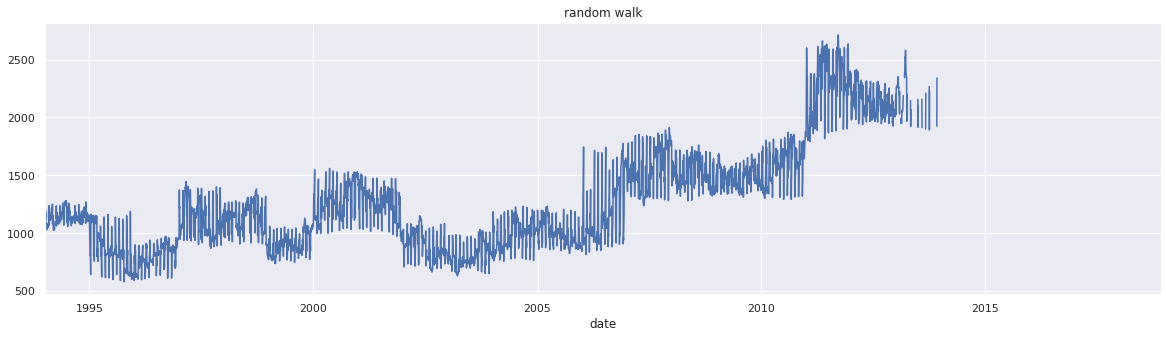

In [21]:
df_copy["rw"].plot(figsize = (20,5), title = "random walk")

Text(0.5, 1.0, 'random walk and spx')

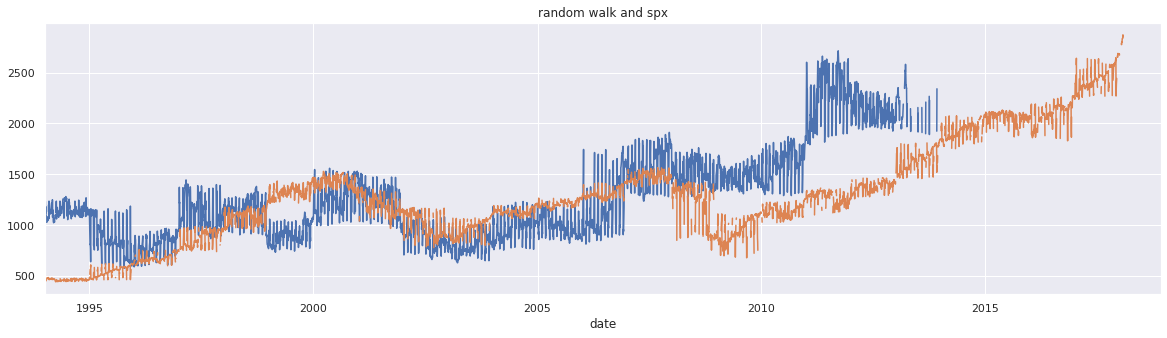

In [22]:
df_copy["rw"].plot(figsize = (20,5))
df_copy["spx"].plot(figsize = (20,5))
plt.title("random walk and spx")

### checking for stationary

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
df_copy["spx"]=df_copy["spx"].fillna(method="ffill")

In [25]:
adfuller(df_copy["spx"])

(0.8536071306784547,
 0.9924540131201472,
 35,
 6464,
 {'1%': -3.431362051167254,
  '5%': -2.8619872394756585,
  '10%': -2.5670080622773273},
 67510.82768199874)

In [26]:
df_copy["rw"]=df_copy["rw"].fillna(method="ffill")

In [27]:
adfuller(df_copy["rw"])


(-0.7270404249736079,
 0.8396205921285039,
 23,
 6476,
 {'1%': -3.4313601750966876,
  '5%': -2.8619864105548753,
  '10%': -2.5670076210246147},
 74415.72679048886)

In [28]:
adfuller(df_copy["wn"])


(-82.51474614813392,
 0.0,
 0,
 6499,
 {'1%': -3.431356598667418,
  '5%': -2.861984830348181,
  '10%': -2.567006779846183},
 98382.89594064468)

### Seasonallity

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
seaon_additive = seasonal_decompose(df_copy_final.spx, model="additive")


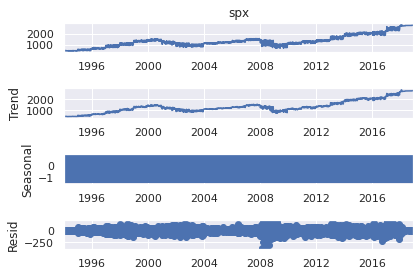

<Figure size 3600x360 with 0 Axes>

In [61]:
seaon_additive.plot()
plt.show()

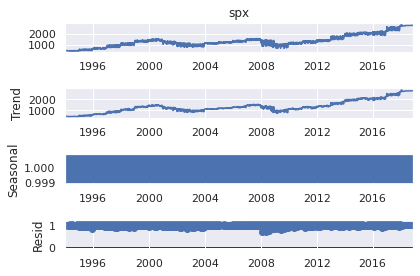

In [63]:
seaon_mult = seasonal_decompose(df_copy_final.spx, model="multitive")
seaon_mult.plot()
plt.show()

### ACF

In [42]:
import statsmodels.graphics.tsaplots as sgt

Text(0.5, 1.0, 'ACF')

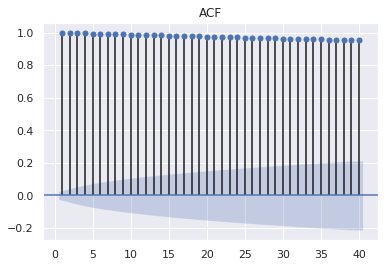

In [43]:
sgt.plot_acf(df["spx"], lags= 40 , zero = False)
plt.title("ACF")

Text(0.5, 1.0, 'ACF')

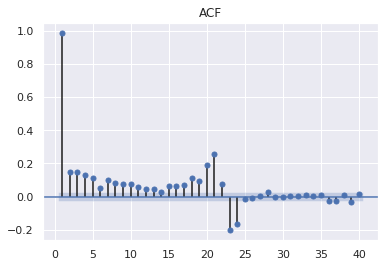

In [44]:
sgt.plot_pacf(df_copy["rw"], lags=40 , zero= False)
plt.title("ACF")

### PACF

Text(0.5, 1.0, 'PACF')

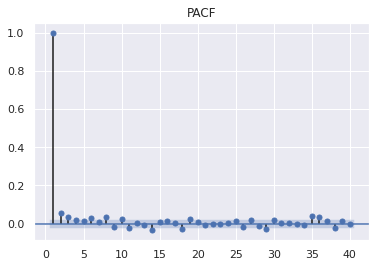

In [32]:
sgt.plot_pacf(df["spx"], lags=40 , zero= False , method=("ols"))
plt.title("PACF")

Text(0.5, 1.0, 'PACF')

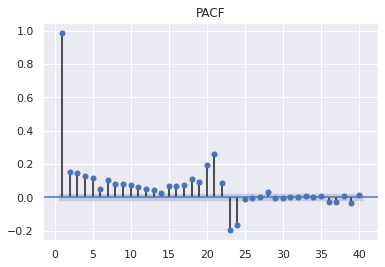

In [33]:
sgt.plot_pacf(df_copy["rw"], lags=40 , zero= False , method=("ols"))
plt.title("PACF")

### AR Model for FTSE

Text(0.5, 1.0, 'ftse ACF')

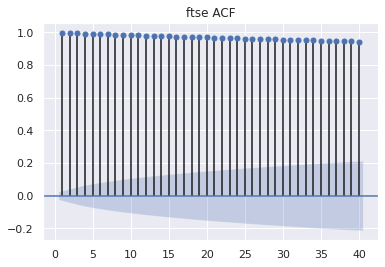

In [34]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df["ftse"], lags = 40 , zero= False)
plt.title("ftse ACF")

Text(0.5, 1.0, 'ftse PACF')

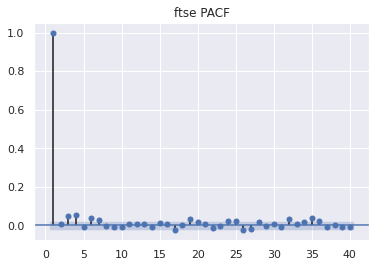

In [35]:
sgt.plot_pacf(df["ftse"], lags = 40 , zero= False, method="ols"  )
plt.title("ftse PACF")
# last lag is the most important

In [36]:
from statsmodels.tsa.arima_model import  ARMA
ar_model = ARMA(df["ftse"], order=(1,0))
ar_result = ar_model.fit()
ar_result.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                     ARMA(1, 0)   Log Likelihood              -34398.217
Method:                       css-mle   S.D. of innovations             58.416
Date:                Sat, 10 Dec 2022   AIC                          68802.433
Time:                        09:24:55   BIC                          68822.664
Sample:                             0   HQIC                         68809.443
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5816.5661    865.837      6.718      0.000    4119.557    7513.575
ar.L1.ftse     0.9991      0.001   1511.721      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
ar_model_2 = ARMA(df["ftse"], order=(2,0))
ar_result_2= ar_model_2.fit()
ar_result_2.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                     ARMA(2, 0)   Log Likelihood              -34397.985
Method:                       css-mle   S.D. of innovations             58.414
Date:                Sat, 10 Dec 2022   AIC                          68803.969
Time:                        09:24:56   BIC                          68830.943
Sample:                             0   HQIC                         68813.316
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5801.0195    853.767      6.795      0.000    4127.668    7474.371
ar.L1.ftse     0.9907      0.013     78.826      0.000       0.966       1.015
ar.L2.ftse     0.0084      0.013      0.669      0.504      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2         -118.8451           +0.0000j          118.8451            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
ar_model_3 = ARMA(df["ftse"], order=(3,0))
ar_result_3 = ar_model_3.fit()
ar_result_3.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                     ARMA(3, 0)   Log Likelihood              -34390.948
Method:                       css-mle   S.D. of innovations             58.349
Date:                Sat, 10 Dec 2022   AIC                          68791.895
Time:                        09:24:56   BIC                          68825.612
Sample:                             0   HQIC                         68803.578
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5422.7142    707.092      7.669      0.000    4036.839    6808.590
ar.L1.ftse     0.9903      0.013     78.861      0.000       0.966       1.015
ar.L2.ftse    -0.0381      0.018     -2.153      0.031      -0.073      -0.003
ar.L3.ftse     0.0470      0.013      3.721      0.000       0.022       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -0.0943           -4.6117j            4.6127           -0.2533
AR.3           -0.0943           +4.6117j            4.6127            0.2533
-----------------------------------------------------------------------------
"""

### comparing models

In [39]:
from scipy.stats import chi2
def LLR_test(mod_1 , mod_2 ,DF=1): # DF degree of Freedom
  L1 = mod_1.fit().llf
  L2 = mod_2.fit().llf
  LR = 2*(L2-L1)
  p = chi2.sf(LR,DF).round(4)
  return p

In [40]:
LLR_test(ar_model_2, ar_model_3)

0.0002

In [41]:
ar_model_4 = ARMA(df["ftse"], order=(4,0))
ar_result_4 = ar_model_4.fit()
print(ar_result_4.summary())
print(LLR_test(ar_model_3, ar_model_4))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

                              ARMA Model Results                              
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                     ARMA(4, 0)   Log Likelihood              -34381.983
Method:                       css-mle   S.D. of innovations             58.265
Date:                Sat, 10 Dec 2022   AIC                          68775.966
Time:                        09:24:57   BIC                          68816.427
Sample:                             0   HQIC                         68789.986
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5422.7142    756.819      7.165      0.000    3939.377    6906.051
ar.L1.ftse     0.9878      0.013     78.836      0.000       0.963       1.012
ar.L2.ftse    -0.0361      0.018     -2.042      0.0

### is the data stationary

In [65]:
from statsmodels.tsa.stattools import adfuller
adfuller(df["ftse"])

(-1.5942821597949661,
 0.48646513020568777,
 6,
 6262,
 {'1%': -3.4313947113763845,
  '5%': -2.862001669939781,
  '10%': -2.5670157439442236},
 68396.51796279417)

data is not stationary

### using returns

returns are the percentage change of the previos period

In [69]:
df["returns_ftse"] = df["ftse"].pct_change(1).mul(100)

In [70]:
# without NA in returns
df_new = df.iloc[1:,:]

In [72]:
adfuller(df_new["returns_ftse"] )

(-15.182022490939026,
 6.178382600320238e-28,
 34,
 6233,
 {'1%': -3.4313995740622145,
  '5%': -2.8620038184370746,
  '10%': -2.567016887640913},
 19014.128593790985)

now the data is stationary and to work with AC models

### ACF and PACF for returns

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

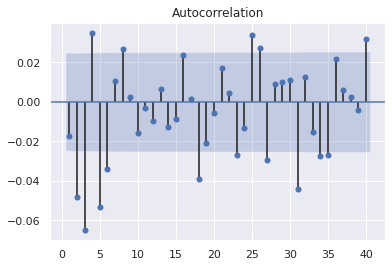

In [78]:
plot_acf(df_new["returns_ftse"],lags = 40 , zero = False)
plt.show()

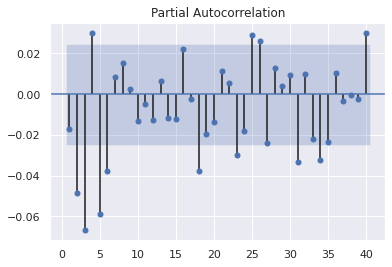

In [80]:
plot_pacf(df_new["returns_ftse"],lags = 40 , zero = False, method ="ols")
plt.show()